<h1><center>Metody numeryczne i optymalizacja</center></h1>

<h3><center>Lista 6</center></h3>
<h3><center>PROGRAMOWANIE LINIOWE</center></h3>



<h6><center>Antoni Bezdzietny 249327</center></h6>

<h6><center>Paweł Krysa 249171</center></h6>

<h6><center>20.05.2022</center></h6>

## Wstęp merytoryczny
**Programowanie liniowe** polega na optymalizacji wartości funkcji z zachowaniem układu nierówności liniowych. Jeśli liczba $b$ jest liczbą rzeczywistą, a $f$ - funkcją liniową, to równanie
$$f(x_1,x_2,\dots,x_n)=b$$
jest **równością liniową**, a nierówności
$$f(x_1,x_2,\dots,x_n) \leq b$$
oraz
$$f(x_1,x_2,\dots,x_n) \geq b$$
to **nierówności liniowe**.
Problem programowania liniowego to problem minimalizacji albo maksymalizacji funkcji liniowej z zachowaniem pewnego skończonego zbioru ograniczeń liniowych.

---
### Algorytm Simplex
Danymi wejściowymi algorytmu jest układ liniowy, na wyjściu uzyskiwane jes rozwiązanie optymalne. Algorytm rozpoczyna od pewnego wierzchiłka i wykonuje ciąg iteracji. W każdej iteracji następuje przejście wzdłuż krawędzi, do sąsiedniego wierzchołka o nie mniejszej wartości funkcji celu. Algorytm kończy zadanie w momencie osiagnienięcia lokalnego minimum. 


In [1]:
import numpy as np
import scipy.optimize as sp
import matplotlib.pyplot as plt

In [2]:
class SimplexV2:
    def SimplexV2(A,b,c):
        tableau = SimplexV2.__createTableau(A,b)
        for i in range(A.shape[1]):
            pivotRow = SimplexV2.__findPivotRow(tableau, i) 
            SimplexV2.__switchRows(tableau,i,pivotRow)
            SimplexV2.__gaussianRowReduction(tableau,i)
        
        return tableau[:A.shape[1],-1]
            
        
    def __createTableau(A,b):
        tableau = np.concatenate((A,np.diag(np.ones(A.shape[0]))), axis=1) 
        tableau = np.concatenate((tableau,b), axis=1)
        return tableau
    
    def __findPivotRow(tableau, col):
        outType = np.empty(tableau[col:,-1].shape)
        outType[:] = np.inf
        r = np.divide(tableau[col:,-1], 
                      tableau[col:, col], 
                      out=outType, 
                      where=tableau[col:, col]!=0)
        pivotRow = np.argmin(np.where(r>=0, r, 1e8-r))+col
        return pivotRow
    
    def __switchRows(tableau,toRow,pivotRow):
        if pivotRow == toRow:
            return
        
        tmp = np.copy(tableau[pivotRow,:])
        tableau[pivotRow,:] = tableau[toRow,:]
        tableau[toRow,:] = tmp
        
    def __gaussianRowReduction(tableau, row):
        tableau[row,:] = tableau[row,:]/tableau[row,row]
        coef = tableau[:,[row]]/tableau[row,row]
        coef[row,0] = 0 
        tableau[:,:] -= np.multiply(coef,tableau[row,:])      

In [64]:
def draw2DVisualization(A,b,solve,xlim=(0,50),ylim=(0,50), eq="≤"):
    x_1 = np.linspace(xlim[0], xlim[1], 1000)
    equation = np.concatenate((A,b), axis=1)
    zeroArg = np.argwhere(equation[:,:2]==0)[:,0]
    oneSide = np.copy(equation[zeroArg,:])
    equation = np.delete(equation, zeroArg, axis=0)
    equation = equation/equation[:,[1]]

    fig, ax = plt.subplots()
    fig.set_size_inches(8, 6)
    for i in range(equation.shape[0]):
        plt.plot(x_1, equation[i,2] - (equation[i,0]*x_1), label=f'{A[i,0]}x1+{A[i,1]}x2{eq}{b[i,0]}')
          
    for i in range(oneSide.shape[0]):
        if oneSide[i,0] == 0:
            plt.axhline(oneSide[i,2], color = 'g', label=f'${oneSide[i,1]}x_2 {eq} {oneSide[i,2]}$') # constraint 1
        if oneSide[i,1] == 0:
            plt.axvline(oneSide[i,2], color = 'g', label=f'${oneSide[i,0]}x_1 {eq} {oneSide[i,2]}$') # constraint 1
        
    plt.plot(solve[0], solve[1], 'ro', label="Solve")
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    for i in range(equation.shape[0]):
        plt.fill_between(x_1, equation[i,2] - (equation[i,0]*x_1),  0 if eq=="≤" else ax.get_ylim()[1], alpha=0.2)

    plt.grid()
    plt.legend()
    plt.show()

## Zadanie 1
---
Znajdź liczby x1 i x2 , które maksymalizują sumę x1 + x2 przy ograniczeniach:
$$
x1 ≥ 0, x2 ≥ 0, \\
x1 + 2x2 ≤ 4, \\
4x1 + 2x2 ≤ 12,\\
−x 1 + x2 ≤ 1,
$$
Narysować zbiór dopuszczalnych rozwiązań na $R^2$ i znaleźć rozwiązanie w ujęciu
geometrycznym, formułując zadanie programowania liniowego.


Rozwiązanie znalezione zaimplementowaną metodą:[2.66666667 0.66666667]
Rozwiązanie znalezione metodą z SciPy:[2.66666667 0.66666667]


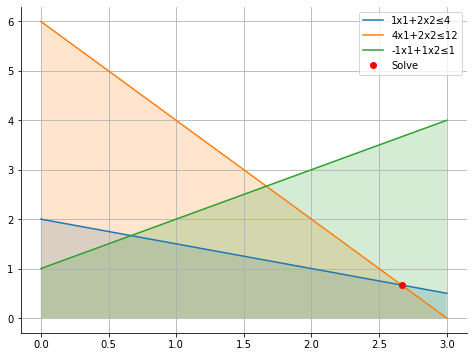

In [113]:
A = np.array([[1,2],
              [4,2],
              [-1,1]])
b = np.array([4,12,1]).reshape(3,1)
c = np.array([-1,-1])

solveSimp = SimplexV2.SimplexV2(A,b,c)
print(f'Rozwiązanie znalezione zaimplementowaną metodą:{solveSimp}')

solveSp = sp.linprog(method='simplex', A_ub=A, b_ub=b, c=np.array([-1,-1]))
print(f'Rozwiązanie znalezione metodą z SciPy:{solveSp.x}')

draw2DVisualization(A,b,solveSimp,(0,3))

### Rozwiązanie ręczne:
| $x_1$ | $x_2$ | $x_3$ | $x_4$ | $x_5$ | b  |
|------|------|------|------|------|----|
| 1    | 2    | 1    | 0    | 0    | 4  |
| 4    | 2    | 0    | 1    | 0    | 12 |
| -1   | 1    | 0    | 0    | 1    | 1  |
|------|------|------|------|------|----|
| -1   | -1   | 0    | 0    | 0    | 0  |

$$ \Downarrow$$

| $x_1$ | $x_2$ | $x_3$ | $x_4$ | $x_5$ | b  |
|------|------|------|------|------|----|
| 0    | $\frac{3}{2}$    | 1    | -$\frac{1}{4}$    | 0    | 1  |
| 1    | $\frac{1}{2}$    | 0    | $\frac{1}{4}$    | 0    | 3 |
| 0   | $\frac{3}{2}$    | 0    | $\frac{1}{4}$    | 1    | 4  |
|------|------|------|------|------|----|
| 0   | $-\frac{1}{2}$   | 0    | $\frac{1}{4}$    | 0    | 3  |

$$ \Downarrow$$

| $x_1$ | $x_2$ | $x_3$ | $x_4$ | $x_5$ | b  |
|------|------|------|------|------|----|
| 0    | 1    | $\frac{2}{3}$    | -$\frac{1}{6}$    | 0    | $\frac{2}{3}$  |
| 1    | 0    | -$\frac{1}{3}$    | $\frac{1}{3}$    | 0    | $\frac{8}{3}$ |
| 0   | 1    | -1    | $\frac{1}{2}$    | 1    | 4  |
|------|------|------|------|------|----|
| 0   | 0   | $\frac{1}{3}$    | $\frac{1}{6}$    | 0    | 10/3  |

$$ \Downarrow$$

$$
x_1 = \frac{10}{3} \\
x_2 = \frac{2}{3}
$$


## Zadanie 2
---
Zrównoważona normalna dieta zakłada, że codziennie powinniśmy spożywać co
najmniej 60 gramów białka i co najmniej 120 gramów węglowodanów. Zakładamy, że 100
gram sera zawiera 20 gramy białka i 20 gramy węglowodanów, natomiast taka sama ilość
chleba zawiera 10 gram białka i 30 gramy węglowodanów. Proszę wyznaczyć najbardziej
ekonomiczną dietę przy założeniu, że cena sera wynosi 30 zł/kg, a chleba 20 zł/kg.


Wymagania: 
- Białko $\geqslant$ 60
- Węglowaodany $\geqslant$ 120

Założenia:
- Ser w 100g: (Cena: 3zł/100g) 
    - 20g białka
    - 20g węglowodanów
- Chleb w 100g: (Cena: 2zł/100g) 
    - 10g białka
    - 30g węglowodanów
    
---
Minimalizacja funkcji celu : $3x_1+2x_2$, gdzie 

$x_1$-ser, 

$x_2$-chleb

Przy założeniach:
$$
\left\{\begin{matrix}
20x_1 & + & 10x_2 & \geq  & 60 \\ 
20x_1 & + & 30x_2 & \geq  & 120
\end{matrix}\right.
$$

Rozwiązanie znalezione zaimplementowaną metodą:[1.5 3. ]
Rozwiązanie znalezione metodą z SciPy:[1.5 3. ]


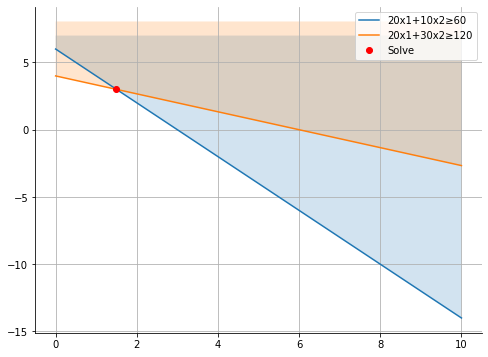

Koszt optymalnej diety 10.5 zł


In [114]:
A = np.array([[20,10],
              [20,30]])
b = np.array([[60],
              [120]])
c = np.array([3,2])

solveSimp = SimplexV2.SimplexV2(A,b,c)
print(f'Rozwiązanie znalezione zaimplementowaną metodą:{solveSimp}')

solveSp = sp.linprog(method='simplex', A_eq=A, b_eq=b, c=c)
print(f'Rozwiązanie znalezione metodą z SciPy:{solveSp.x}')

draw2DVisualization(A,b,solveSimp,(0,10),eq="≥")

print(f'Koszt optymalnej diety {solveSimp@c.T} zł')

### Wnioski

---
Wyniki uzyskane zaimplementowaną metodą simplex, jak i metodą dostępną w pakiecie sciPy dostarczają takie same wyniki. Minimalizację kosztów uzyskujemy dla 150g sera oraz 300g chleba. Koszt diety 10,50zł.

## Zadanie 3
---
Ciężarówka może przewieźć z Wrocławia do Krakowa następujące produkty: sól,
ryż i makaron. Maksymalna objętość załadunkowa wynosi 7000 litrów, a maksymalne
obciążenie 5000 kg. Zakładamy, że jeden kilogram soli, ryżu i makaronu ma objętość
odpowiednio 0,5, 2 i 2 litrów. Zysk z przewozu 100 kg soli, ryżu i makaronu wynosi
odpowiednio 8 zł, 10 zł i 25 zł. Ile soli, ryżu i makaronu należy załadować do ciężarówki, aby
zysk był jak największy?

Wymagania:
- $V_{max} ≤ 7000l$
- $m_{max} ≤ 5000kg$

Oznaczenia:
- $x_1$-sól,  
- $x_2$-ryż,
- $x_3$-makaron

Zysk z 100kg:
- $x_1$ - 8zł
- $x_2$ - 10zł
- $x_3$ - 25zł

Objętość z kilograma towaru:
- $x_1$ - 0,5l
- $x_2$ - 2l
- $x_3$ - 2l

---
Minimalizacja funckji celu $\frac{8x_1}{100}+\frac{10x_2}{100}+\frac{25x_3}{100}$, z ograniczeniami:
$$
\left\{\begin{matrix}
x_1 &+& x_2 &+& x_3 & \leqslant & 5000 \\ 
0,5x_1 &+& 2x_2  &+& 2x_3 & \leqslant & 7000
\end{matrix}\right.
$$

Rozwiązanie znalezione metodą z SciPy:[2000.    0. 3000.]
Po wykreśleniu ryżu ze względu na brak opłacalności:
Rozwiązanie znalezione zaimplementowaną metodą:[2000. 3000.]


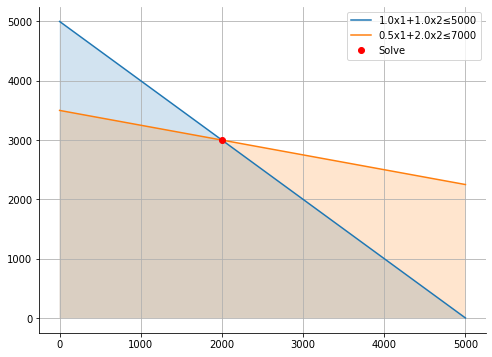

In [112]:
A = np.array([[1,1,1],
              [0.5,2,2]])
b = np.array([[5000],
              [7000]])
c = np.array([-8/100, -10/100, -25/100])

solveSp = sp.linprog(method='simplex', A_eq=A, b_eq=b, c=c)
print(f'Rozwiązanie znalezione metodą z SciPy:{solveSp.x}')

print(f'Po wykreśleniu ryżu ze względu na brak opłacalności:')
A = np.concatenate((A[:,[0]],A[:,[2]]), axis=1)
c = np.array(c[0],c[1])
solveSimp = SimplexV2.SimplexV2(A,b,c)
print(f'Rozwiązanie znalezione zaimplementowaną metodą:{solveSimp}')
draw2DVisualization(A,b,solveSimp,(0,5000))


### Wnioski

---
W powyższym zadaniu należy inne metody niż simplex, w tym celu można skorzystać z dwufazowego simplexa. W zadaniu oczywista była możliwość wyeliminowania ryżu ze względów ekonomicznych zdecydowanie bardziej opłacalny był przewóz makaron. Przy tej samej wadze i objętości zysk z makaronu jest o 15zł większa.
Zgodnie z powyższym najkorzystniej jest przewozić 2000kg soli oraz 3000kg makaronu.

## Zadanie 4
---
W pewnej rafinerii proces rafinacji wymaga wyprodukowania co najmniej dwóch
litrów benzyny na każdy litr oleju opałowego. Aby sprostać przewidywanemu zapotrzebowaniu
w okresie zimowym, trzeba będzie produkować co najmniej trzy miliony litrów oleju
opałowego dziennie. Z kolei, zapotrzebowanie na benzynę wynosi nie więcej niż 6,4 miliona
litrów dziennie. Jeśli benzynę sprzedaje się po 1,90 dolara za litr, a olej opałowy po 1,50 dolara
za litr, to ile należy wyprodukować każdego z tych produktów, aby zmaksymalizować
przychody?

---

Przyjęte oznaczenia:
- $x_1$-litr benzyny,  
- $x_2$-litr oleju opałowego.

Zysk z 1l:
- $x_1$ - 1,9\$
- $x_2$ - 1,5\$


Ograniczenia wynikające z treści:

- Ograniczenie ilości sprzedaży:
$$x_1 \leq 6,4*10^6$$
$$x_2 \geq 3e*10^6  \Rightarrow  -x_2 \leq 3e*10^6$$
- Ograniczenia ryzyka:
$$ x_1 - 2x_2 \leq 0 $$


Funkcja do minimializacji: $-1,9x_1-1,5x_2$

Rozwiązanie znalezione zaimplementowaną metodą:[6400000. 3200000.]
Rozwiązanie znalezione metodą z SciPy:[6400000. 3200000.]


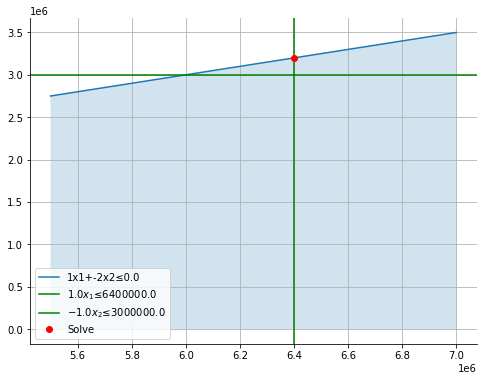

Maksymalne dochody 16960000.0 $


In [84]:
A = np.array([[1,-2],
              [1,0],
              [0,-1]])
b = np.array([[0],
              [6.4e6],
             [3e6]])
c = np.array([-1.9,-1.5])

solveSimp = SimplexV2.SimplexV2(A,b,c)
print(f'Rozwiązanie znalezione zaimplementowaną metodą:{solveSimp}')

solveSp = sp.linprog(method='simplex', A_ub=A, b_ub=b, c=c)
print(f'Rozwiązanie znalezione metodą z SciPy:{solveSp.x}')

draw2DVisualization(A,b,solveSimp,(5.5e6,7e6))
print(f'Maksymalne dochody {solveSimp@-c.T} $')

### Wnioski

---
Maksymalizację zysków uzyskujemy dla 6400000l benzyny oraz 3200000l oleju opałowego. Zysk 16960000 $.

## Zadanie 5
---
Załóżmy, że mamy do zainwestowania 12 000 USD i trzy różne fundusze do
wyboru. Fundusz obligacji komunalnych ma stopę zwrotu 7%, lokata bankowa ma stopę zwrotu
8%, a konto wysokiego ryzyka ma oczekiwaną (spodziewaną) stopę zwrotu 12%. Aby
zminimalizować ryzyko, postanawiasz nie inwestować więcej niż 2000 USD na koncie
wysokiego ryzyka. Ze względów podatkowych musisz zainwestować co najmniej trzy razy
więcej w obligacje komunalne niż w lokatę bankową. Zakładając, że zyski na koniec roku będą
zgodne z oczekiwaniami, jakie są optymalne kwoty inwestycji?

---
Przyjęte oznaczenia:
- $x_1$-obligacji komunalnych,  
- $x_2$-lokata bankowa,
- $x_3$-konto wysokiego ryzyka.

Potencjalny zysk:
- $x_1$-7%,  
- $x_2$-8%,
- $x_3$-12%.

Ograniczenia wynikające z treści:

- Ograniczenie ilości pieniędzy:
$$x_1+x_2+x_3 \leq 12000$$
- Ograniczenia ryzyka:
$$ x_3 \leq 2000 $$
- Ograniczenia wynikające ze względów podatkowych
$$ -3x_1 + x_2 \leq 0$$

Funkcja do minimializacji: $-0.07x_1-0.08x_2-0.12x_3$

In [86]:
A = np.array([[1,1,1],
              [-3,1,0],
              [0,0,1]])
b = np.array([[12000],
              [0],
              [2000]])
c = np.array([-0.07,-0.08,-0.12])

solveSimp = SimplexV2.SimplexV2(A,b,c)
print(f'Rozwiązanie znalezione zaimplementowaną metodą:{solveSimp}')


solveSp = sp.linprog(method='simplex', A_ub=A, b_ub=b, c=c)
print(f'Rozwiązanie znalezione metodą z SciPy:{solveSp.x}')

print(f'Kwota po rocznej kapitalizacji {solveSimp@(1+(-c)).T} zł')


Rozwiązanie znalezione zaimplementowaną metodą:[2500. 7500. 2000.]
Rozwiązanie znalezione metodą z SciPy:[2500. 7500. 2000.]
Kwota po rocznej kapitalizacji 13015.0 zł


### Wnioski

---
Najkorzystniej jest rozłożyć środki w poszczególne aktywa zponiższymi wagami:
- obligacji komunalnych - 2500zł,
- lokata bankowa - 7500zł,
- konto wysokiego ryzyka - 2000zł.

Po rocznej kapitalizacji kwota 13015zł.

## Zadanie 6
---
Firma zajmująca się montażem i dystrybucją drukarek posiada dwa rodzaje
drukarek - laserowe i atramentowe. Montaż każdej drukarki laserowej trwa dwie godziny,
natomiast montaż każdej drukarki atramentowej jedną godzinę, a pracownicy mogą zapewnić
łącznie 40 osobogodzin czasu montażu dziennie. Ponadto, do montażu i dystrybucji drukarek
musi być dostępna przestrzeń magazynowa, 1 metr kwadratowy na każdą drukarkę laserową3 metry kwadratowe na każdą drukarkę atramentową; firma dysponuje łącznie 45 metrami
kwadratowymi powierzchni magazynowej dostępnej dla zmontowanych drukarek każdego
dnia. Drukarki laserowe mogą być sprzedawane z zyskiem 30 euro za sztukę, a drukarki
atramentowe przynoszą zysk 25 euro za sztukę, ale rynek, na którym działa firma, może
wchłonąć maksymalnie 12 drukarek laserowych dziennie. (Na rynku drukarek atramentowych
nie ma takiego ograniczenia). Sformułuj to zadanie jako zadanie programowania liniowego wyznacz liczbę każdego typu drukarek, które firma powinna montować i dystrybuować, aby
zmaksymalizować dzienny zysk.


---
Przyjęte oznaczenia:
- $x_1$ - drukarka laserowa,
- $x_2$ - drukarka atramentowa.

Ograniczenia wynikające z treści:

- Ograniczenie czasu montażowego:
$$2x_1+x_2 \leq 40$$
- Ograniczenia przestrzeni magazynowej:
$$ x_1+3x_2 \leq 45 $$
- Ograniczenia wynikające z rynku
$$ x_2 \leq 12$$


Funkcja do minimializacji: $-30x_1-25x_2$

Rozwiązanie znalezione zaimplementowaną metodą:[15. 10.]
Rozwiązanie znalezione metodą z SciPy:[15. 10.]


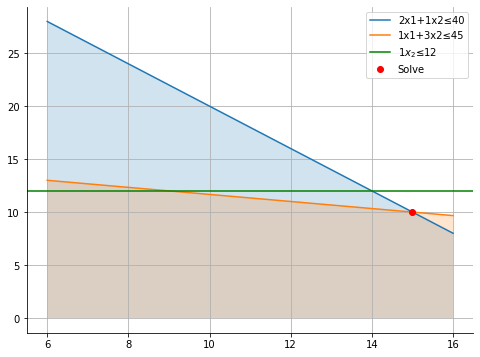

Maksymalny dzienny zysk wynosi: 700.0 zł.


In [87]:
A = np.array([[2,1],
              [1,3],
              [0,1]])
b = np.array([[40],[45],[12]])
c = np.array([-30,-25])

solveSimp = SimplexV2.SimplexV2(A,b,c)
print(f'Rozwiązanie znalezione zaimplementowaną metodą:{solveSimp}')


solveSp = sp.linprog(method='simplex', A_ub=A, b_ub=b, c=c)
print(f'Rozwiązanie znalezione metodą z SciPy:{solveSp.x}')

draw2DVisualization(A,b,solveSimp,(6,16))

print(f'Maksymalny dzienny zysk wynosi: {solveSimp@-c.T} zł.')

### Wnioski
---

Wyniki uzyskane zaimplementowaną metodą simplex, jak i metodą dostępną w pakiecie sciPy dostarczają takie same wyniki. Maksymalizację zadania przy podanych warunkach, uzyskujemy dla 15 drukarek laserowych oraz 10 drukarek atramentowych. Dzienny zysk wyniósłby 700zł.